In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census

In [2]:

# As of Jan 2017, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A copy can be accessed here in case census.gov moves the file:
# data = 'http://inferentialthinking.com/notebooks/nc-est2015-agesex-res.csv'
# or via a local copy
# data = 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table
partial = full_census_table.select(['SEX', 'AGE', 4, 9])
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
ratio = (us_pop.column(3) / us_pop.column(2))
census = us_pop.with_columns(
        'Change', us_pop.column(3) - us_pop.column(2), 
        'Total Growth', ratio - 1,
        'Annual Growth', ratio ** (1/5) - 1)
census.set_format([2, 3, 4], NumberFormatter)
census.set_format([5, 6], PercentFormatter)

SEX,AGE,2010,2015,Change,Total Growth,Annual Growth
0,0,"3,951,330","3,978,038","26,708",0.68%,0.13%
0,1,"3,957,888","3,968,564","10,676",0.27%,0.05%
0,2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
0,3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
0,4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
0,5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
0,6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
0,7,"4,043,046","4,148,360","105,314",2.60%,0.52%
0,8,"4,025,604","4,167,887","142,283",3.53%,0.70%
0,9,"4,125,415","4,133,564","8,149",0.20%,0.04%


In [3]:
by_age = census.where('SEX', 0).drop('SEX').where('AGE', are.below(999))
by_age

AGE,2010,2015,Change,Total Growth,Annual Growth
0,"3,951,330","3,978,038","26,708",0.68%,0.13%
1,"3,957,888","3,968,564","10,676",0.27%,0.05%
2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
7,"4,043,046","4,148,360","105,314",2.60%,0.52%
8,"4,025,604","4,167,887","142,283",3.53%,0.70%
9,"4,125,415","4,133,564","8,149",0.20%,0.04%


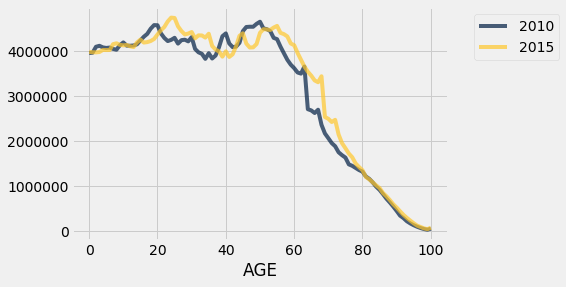

In [4]:
by_age.select(0, 1, 2).plot(0)

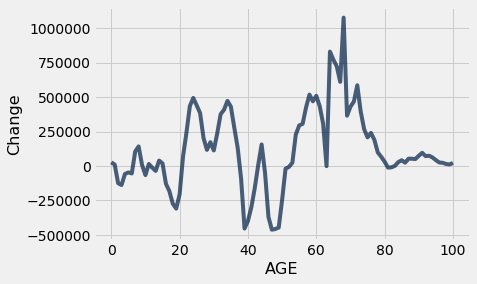

In [5]:
by_age.select(0, 3).plot(0)

In [6]:
by_age.sort(3, descending=True)

AGE,2010,2015,Change,Total Growth,Annual Growth
68,"2,359,816","3,436,357","1,076,541",45.62%,7.81%
64,"2,706,055","3,536,156","830,101",30.68%,5.50%
65,"2,678,525","3,450,043","771,518",28.80%,5.19%
66,"2,621,335","3,344,134","722,799",27.57%,4.99%
67,"2,693,707","3,304,187","610,480",22.66%,4.17%
72,"1,883,820","2,469,605","585,785",31.10%,5.56%
58,"3,802,447","4,320,522","518,075",13.62%,2.59%
60,"3,616,721","4,125,792","509,071",14.08%,2.67%
24,"4,243,602","4,737,345","493,743",11.63%,2.23%
34,"3,822,189","4,294,838","472,649",12.37%,2.36%


In [7]:
2010-68 

1942

In [8]:
2015-68 

1947

In [9]:
by_age.where('AGE', are.above(95)).show()

AGE,2010,2015,Change,Total Growth,Annual Growth
96,"97,161","122,887","25,726",26.48%,4.81%
97,"68,893","92,377","23,484",34.09%,6.04%
98,"47,037","61,991","14,954",31.79%,5.68%
99,"32,178","43,641","11,463",35.62%,6.28%
100,"54,410","76,974","22,564",41.47%,7.18%


## Movies

In [10]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


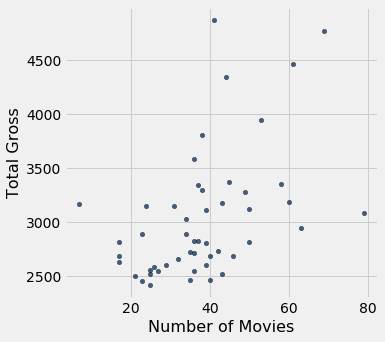

In [11]:
actors.scatter('Number of Movies', 'Total Gross')

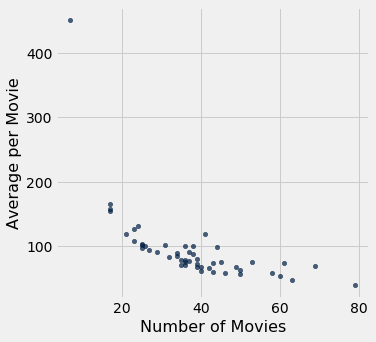

In [12]:
actors.scatter('Number of Movies', 'Average per Movie')

In [13]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


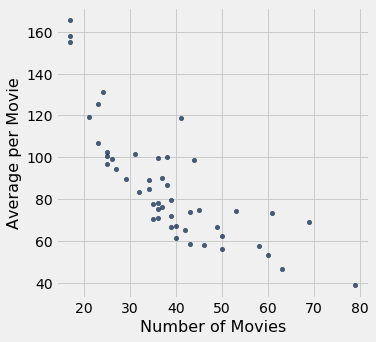

In [14]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [15]:
actors.where('Number of Movies', are.above(50))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Bruce Willis,3189.4,60,53.2,Sixth Sense,293.5
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [16]:
movies = Table.read_table('movies_by_year.csv')
movies

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


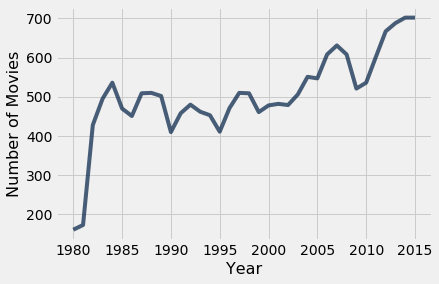

In [17]:
movies.plot('Year', 'Number of Movies')

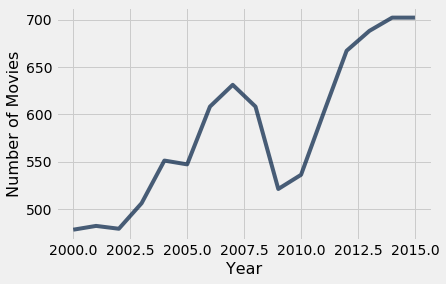

In [18]:
century_21 = movies.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

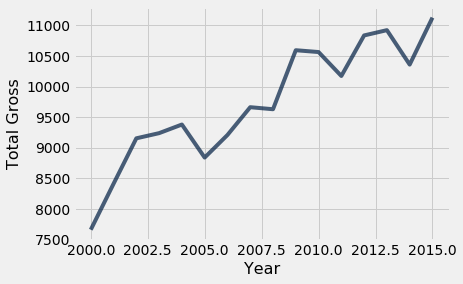

In [19]:
century_21.plot('Year', 'Total Gross')

In [20]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


## Plotting Categorical Distributions

In [21]:
top = Table.read_table('top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


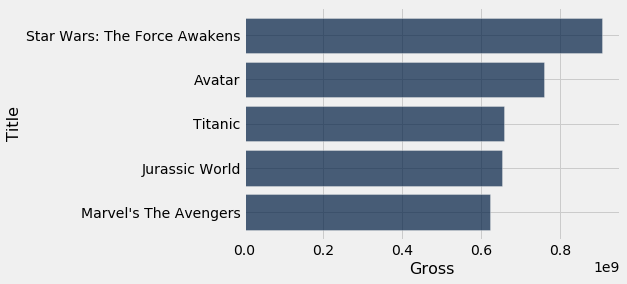

In [22]:
top5 = top.take(np.arange(5))
top5.barh(0, 2)

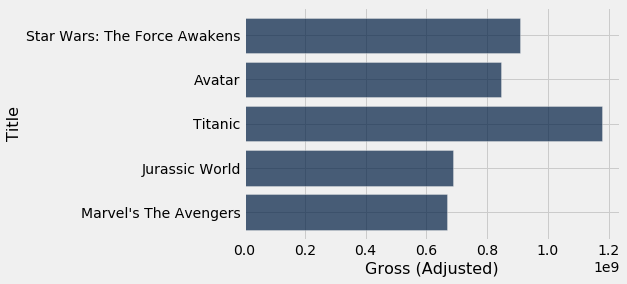

In [23]:
top5.barh(0, 3)

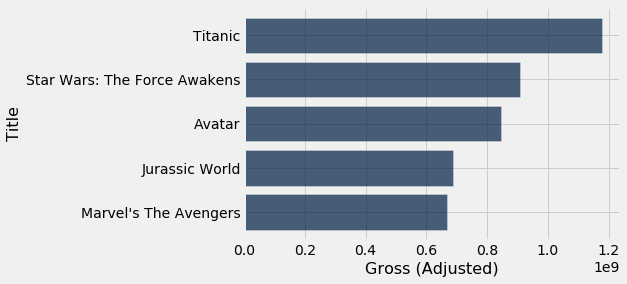

In [24]:
top5.sort(3, descending=True).barh(0, 3)

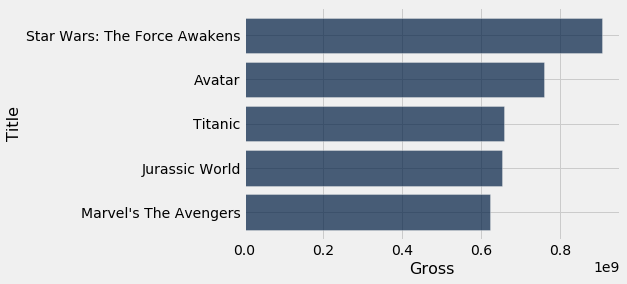

In [25]:
top5.select(0, 2).barh('Title')

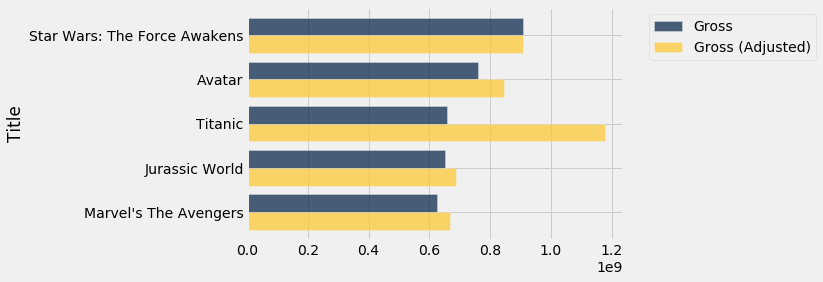

In [26]:
top5.select(0, 2, 3).barh('Title')

In [27]:
studios = top.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


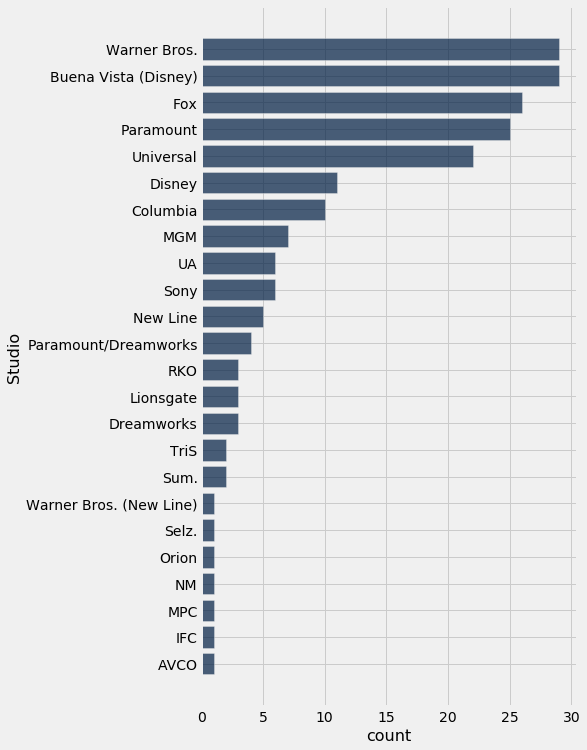

In [28]:
studios.sort('count', descending=True).barh('Studio')